In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from scipy.signal import savgol_filter
import pandas as pd
sns.set(rc = {'figure.figsize':(10,8)})

In [17]:
def list_to_numpy(data):
    new_data = [np.array(i) for i in data]
    return np.array(new_data)

def count_food(data):
    new_data = [np.count_nonzero(np.array(i) == 100) for i in data]
    return np.array(new_data)

def count_survived(rewards, foodCollected, max_food=8, n_steps=300):
    new_data = []
    for r,food in zip(rewards,foodCollected):
        #pretent like the robot wouldnt touch the walls when the episode has been terminated due all food being collected
        if food == max_food:
            new_data.append(n_steps)
        else:
            new_data.append(len(r))

    # new_data = [len(i) if np.count_nonzero(np.array(i) == 100) == max_food else n_steps for i in data]
    return np.array(new_data)

def training_line_plot_v1(DQN, DDPG, titles, xlabel, ylabels):
    fig, axes = plt.subplots(2, 2, sharex=True)

    x = np.arange(300)

    # Rewards 
    sum_reward = np.array([np.sum(row) for row in DQN[0]])
    axes[0, 0] = sns.lineplot(x, savgol_filter(sum_reward, 51, 3), ax=axes[0, 0], color='blue')
    axes[0, 0] = sns.lineplot(x, sum_reward, ax=axes[0, 0], alpha=0.5, color='darkblue')

    sum_reward = np.array([np.sum(row) for row in DDPG[0]])
    axes[0, 1] = sns.lineplot(x, savgol_filter(sum_reward, 51, 3), ax=axes[0, 1], color='blue')
    axes[0, 1] = sns.lineplot(x, sum_reward, ax=axes[0, 1], alpha=0.5, color='darkblue')

    # Collected Food
    sum_food = np.array([np.sum(row) for row in DQN[1]])
    axes[1, 0] = sns.lineplot(x, savgol_filter(sum_food, 51, 3), ax=axes[1, 0], color='green')
    axes[1, 0] = sns.barplot(x, sum_food, ax=axes[1, 0], alpha=0.5, color='darkgreen')

    sum_food = np.array([np.sum(row) for row in DDPG[1]])
    axes[1, 1] = sns.lineplot(x, savgol_filter(sum_food, 51, 3), ax=axes[1, 1], color='green')
    axes[1, 1] = sns.barplot(x, sum_food, ax=axes[1, 1], alpha=0.5, color='darkgreen')

    # Labels etc
    axes[0, 0].set_title(titles[0])
    axes[0, 1].set_title(titles[1])
    axes[1, 0].set_xlabel(xlabel)
    axes[1, 1].set_xlabel(xlabel)
    axes[0, 0].set_ylabel(ylabels[0])
    axes[1, 0].set_ylabel(ylabels[1])
    plt.xticks([0, 50, 100, 150, 200, 250, 300])
    plt.show()

def training_line_plot_v2(DQN, DDPG, titles, xlabel, ylabels):
    # Plots the lines in the save figure
    fig, axes = plt.subplots(3, sharex=True)

    x = np.arange(300)

    # Rewards 
    sum_reward = np.array([np.sum(row) for row in DQN[0]])
    axes[0] = sns.lineplot(x, savgol_filter(sum_reward, 51, 3), ax=axes[0], color='blue', label=titles[0])
    axes[0] = sns.lineplot(x, sum_reward, ax=axes[0], alpha=0.5, color='darkblue')

    sum_reward = np.array([np.sum(row) for row in DDPG[0]])
    axes[0] = sns.lineplot(x, savgol_filter(sum_reward, 51, 3), ax=axes[0], color='red', label=titles[1])
    axes[0] = sns.lineplot(x, sum_reward, ax=axes[0], alpha=0.5, color='darkred')

    # Collected Food
    sum_food = np.array([np.sum(row) for row in DQN[1]])
    axes[1] = sns.lineplot(x, savgol_filter(sum_food, 51, 3), ax=axes[1], color='blue', label=titles[0])
    axes[1] = sns.barplot(x, sum_food, ax=axes[1], alpha=0.5, color='darkblue')

    sum_food = np.array([np.sum(row) for row in DDPG[1]])
    axes[2] = sns.lineplot(x, savgol_filter(sum_food, 51, 3), ax=axes[2], color='red', label=titles[1])
    axes[2] = sns.barplot(x, sum_food, ax=axes[2], alpha=0.5, color='darkred')

    # # Labels etc
    axes[0].legend(loc='upper left')
    axes[1].legend(loc='upper left')
    axes[2].legend(loc='upper left')
    axes[1].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabels[0])
    axes[1].set_ylabel(ylabels[1])
    axes[2].set_ylabel(ylabels[1])
    plt.xticks([0, 50, 100, 150, 200, 250, 300])
    plt.show()

def validation_box_plot(DDPG, DQN, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)

    ax1 = sns.boxplot(data=[DQN[0], DDPG[0]], ax=ax1)
    ax1.set_xticklabels(['DQN', 'DDPG'])
    ax1.set_xlabel('Algorithm')
    ax1.set_ylabel('Survival rate')

    sum_reward_dqn = [np.sum(row) for row in DQN[1]]
    sum_reward_ddpg = [np.sum(row) for row in DDPG[1]]

    ax2 = sns.boxplot(data=[sum_reward_dqn, sum_reward_ddpg], ax=ax2)
    ax2.set_xticklabels(['DQN', 'DDPG'])
    ax2.set_xlabel('Algorithm')
    ax2.set_ylabel('Reward')

    ax3 = sns.boxplot(data=[DQN[2], DDPG[2]], ax=ax3)
    ax3.set_xticklabels(['DQN', 'DDPG'])
    ax3.set_xlabel('Algorithm')
    ax3.set_ylabel('Collected Food')
    fig.suptitle(title)
    plt.show()
    print()

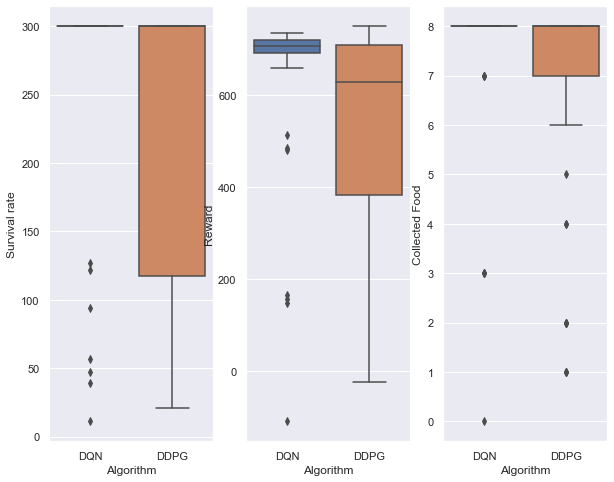

In [18]:
path_dqn = '_task2/DQN/results/'
path_ddpg = '_task2/DDPG/results/'
with open(path_dqn + 'DQN_test_collected_foods_rerun.pkl', 'rb') as file:
    foods_test_DQN = pickle.load(file)

with open(path_ddpg + 'DDPG_evaluation_collected_foods.pkl', 'rb') as file:
    foods_test_DDPG = pickle.load(file)

with open(path_dqn + 'DQN_test_rewards_rerun.pkl', 'rb') as file:
    rewards_test_DQN = pickle.load(file)
survival_rate_DQN = count_survived(rewards_test_DQN, foods_test_DQN, 8, 300)

with open(path_ddpg + 'DDPG_evaluation_rewards.pkl', 'rb') as file:
    rewards_test_DDPG = pickle.load(file)
survival_rate_DDPG = count_survived(rewards_test_DDPG, foods_test_DDPG, 8, 300)

validation_box_plot([survival_rate_DDPG, rewards_test_DDPG, foods_test_DDPG], [survival_rate_DQN, rewards_test_DQN, foods_test_DQN], title='')
# validation_line_plot(rewards_test_DQN, rewards_test_DDPG, title='', xlabel='#Episodes', ylabel='Reward')

In [19]:
#task 1
path_dqn = '_task1/DQN/results/'
path_ddpg = '_task1/DDPG/results/'


with open(path_ddpg + 'DDPG_evaluation_distance_travelled.pkl', 'rb') as file:
    DDPG_test_distance = pickle.load(file)

with open(path_ddpg + 'DDPG_evaluation_rewards.pkl', 'rb') as file:
    DDPG_test_rewards = pickle.load(file)

with open(path_ddpg + 'DDPG_training_rewards.pkl', 'rb') as file:
    DDPG_train_rewards = pickle.load(file)

with open(path_dqn + 'DQN_test_distance_prefer_forwards_2.pkl', 'rb') as file:
    DQN_test_distance = pickle.load(file)

with open(path_dqn + 'DQN_test_rewards_prefer_forwards_2.pkl', 'rb') as file:
    DQN_test_rewards = pickle.load(file)

with open(path_dqn + 'DQN_training_rewards_prefer_forwards_2.pkl', 'rb') as file:
    DQN_train_rewards = pickle.load(file)


task1_testResults = pd.DataFrame()
task1_testResults["distanceTraveled_DQN"] = DQN_test_distance
task1_testResults["distanceTraveled_DDPG"] = DDPG_test_distance

task1_testResults["totalReward_DQN"]= list(map(np.sum,DQN_test_rewards))
task1_testResults["totalReward_DDPG"]= list(map(np.sum,DDPG_test_rewards))

task1_testResults.to_csv("task1_testResults.csv")
task1_testResults

,distanceTraveled_DQN,distanceTraveled_DDPG,totalReward_DQN,totalReward_DDPG
0,6.064338,8.458041,1537.664410,-65.515502
1,2.311731,9.953129,690.698697,66.712372
2,15.906385,9.122642,2349.820187,23.943874
3,15.876481,7.119277,2107.896813,-165.123016
4,15.766280,9.888809,2447.376539,49.830410
5,3.975563,9.295410,2022.797398,18.757599
6,15.704802,6.630046,2223.332283,-259.440449
7,1.522266,7.980015,560.132699,-29.640808
8,15.857685,8.840705,4468.877817,1.429841
9,15.915586,9.098394,3929.792017,52.074211


In [20]:
task1_trainResults = pd.DataFrame()
task1_trainResults["episode"]= np.arange(len(DQN_train_rewards))
task1_trainResults["total reward DQN"]= list(map(np.sum,DQN_train_rewards))
task1_trainResults["total reward DDPG"]= DDPG_train_rewards #list(map(np.sum,DDPG_train_rewards))

task1_trainResults["steps DQN"]= list(map(len,DQN_train_rewards))
#task1_trainResults["steps DDPG"]= list(map(len,DDPG_train_rewards))

task1_trainResults.to_csv("task1_trainResults.csv")
task1_trainResults


,episode,total reward DQN,total reward DDPG,steps DQN
0,0,187.092674,-38.555933,8
1,1,81.075670,-144.736441,5
2,2,564.395824,-129.991600,21
3,3,1889.219366,-113.481083,50
4,4,323.618852,-124.471422,13
...,...,...,...,...
195,195,1578.982924,-24.421051,34
196,196,1776.489008,-107.817372,51
197,197,1279.468480,-114.951876,35
198,198,6285.447428,-4.565326,135


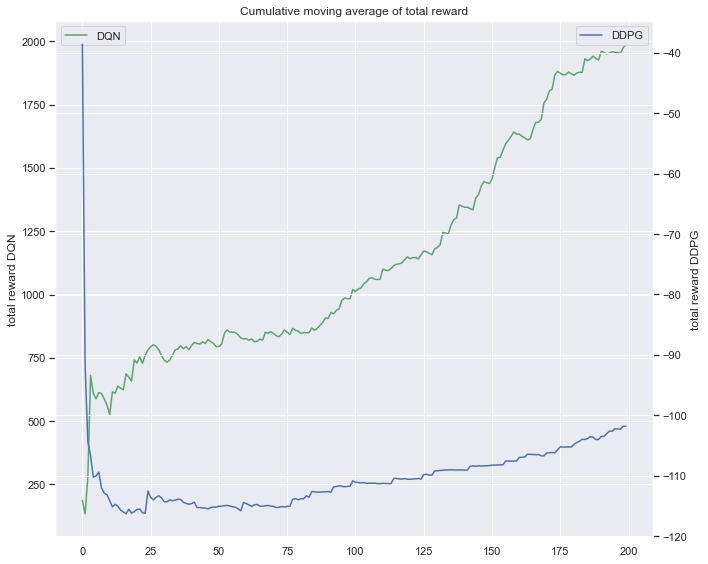

In [21]:
g = sns.lineplot(data=task1_trainResults["total reward DQN"].expanding().mean(), color="g", label="DQN")
sns.lineplot(data=task1_trainResults["total reward DDPG"].expanding().mean(), color="b", ax=g.axes.twinx(), label="DDPG")
plt.xlabel("Episode")
plt.title("Cumulative moving average of total reward")
plt.tight_layout()

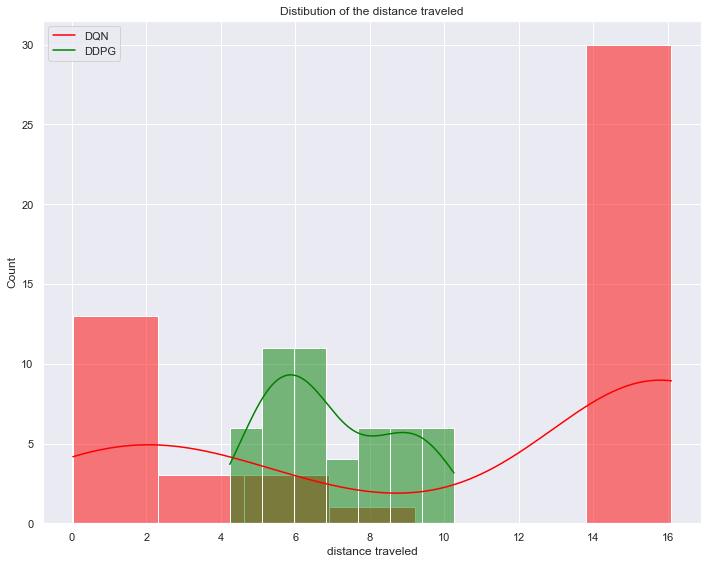

In [30]:
sns.histplot(data=task1_testResults["distanceTraveled_DQN"], stat="percent", discrete=False, kde=True, color="red")
sns.histplot(data=task1_testResults["distanceTraveled_DDPG"], stat="percent", discrete=False, kde=True, color="green")

plt.legend(labels=["DQN","DDPG"])
plt.xlabel("distance traveled")
plt.ylabel("Percent")
plt.title("Distibution of the distance traveled")
plt.tight_layout()

In [23]:
#task 2: validation arena
path_dqn = '_task2/DQN/results/'
path_ddpg = '_task2/DDPG/results/'


with open(path_dqn + 'DQN_test_collected_foods_rerun.pkl', 'rb') as file:
    food_val_DQN = pickle.load(file)

with open(path_ddpg + 'DDPG_evaluation_collected_foods.pkl', 'rb') as file:
    food_val_DDPG = pickle.load(file)

with open(path_dqn + 'DQN_test_rewards_rerun.pkl', 'rb') as file:
    stepRewards_val_DQN = pickle.load(file)

with open(path_ddpg + 'DDPG_evaluation_rewards.pkl', 'rb') as file:
    stepRewards_val_DDPG = pickle.load(file)

task2_validationResults = pd.DataFrame()
task2_validationResults["validationEpisode"] = np.arange(np.shape(food_val_DDPG)[0]) *6 +6

task2_validationResults["collectedFood_DQN"] = food_val_DQN
task2_validationResults["collectedFood_DDPG"] = food_val_DDPG

task2_validationResults["totalReward_DQN"]= list(map(np.sum,stepRewards_val_DQN))
task2_validationResults["totalReward_DDPG"]= list(map(np.sum,stepRewards_val_DDPG))

task2_validationResults["stepsTaken_DQN"]= list(map(len,stepRewards_val_DQN))
task2_validationResults["stepsTaken_DDPG"]= list(map(len,stepRewards_val_DDPG))

task2_validationResults["survival_rate_DQN"]= count_survived(stepRewards_val_DQN, food_val_DDPG, 8, 300)
task2_validationResults["survival_rate_DDPG"]= count_survived(stepRewards_val_DDPG, food_val_DDPG, 8, 300)
task2_validationResults.to_csv("task2_validationResults.csv")
task2_validationResults

,validationEpisode,collectedFood_DQN,collectedFood_DDPG,totalReward_DQN,totalReward_DDPG,stepsTaken_DQN,stepsTaken_DDPG,survival_rate_DQN,survival_rate_DDPG
0,6,8,7,721,473,87,135,87,135
1,12,7,1,481,-19,127,21,127,21
2,18,8,8,720,691,88,117,300,300
3,24,0,8,-110,667,11,141,300,300
4,30,3,8,147,746,57,62,300,300
5,36,8,7,727,402,81,206,81,206
6,42,8,8,719,729,89,79,300,300
7,48,8,7,706,348,102,260,102,260
8,54,8,1,723,-22,85,24,85,24
9,60,8,8,713,714,95,94,300,300


In [24]:
#task 2: training
path_dqn = '_task2/DQN/results/'
path_ddpg = '_task2/DDPG/results/'


with open(path_dqn + 'DQN_training_collected_foods_rerun.pkl', 'rb') as file:
    food_training_DQN = pickle.load(file)

with open(path_ddpg + 'DDPG_training_collected_foods.pkl', 'rb') as file:
    food_training_DDPG = pickle.load(file)

with open(path_dqn + 'DQN_training_rewards_rerun.pkl', 'rb') as file:
    stepRewards_training_DQN = pickle.load(file)

with open(path_ddpg + 'DDPG_training_rewards_final.pkl', 'rb') as file:
    stepRewards_training_DDPG = pickle.load(file)

task2_trainingResults = pd.DataFrame()
task2_trainingResults["episode"] = np.arange(np.shape(food_training_DDPG)[0]) +1

task2_trainingResults["collectedFood_DQN"] = food_training_DQN
task2_trainingResults["collectedFood_DDPG"] = food_training_DDPG

task2_trainingResults["totalReward_DQN"]= list(map(np.sum,stepRewards_training_DQN))
task2_trainingResults["totalReward_DDPG"]= list(map(np.sum,stepRewards_training_DDPG))

task2_trainingResults["stepsTaken_DQN"]= list(map(len,stepRewards_training_DQN))
task2_trainingResults["stepsTaken_DDPG"]= list(map(len,stepRewards_training_DDPG))

task2_trainingResults["survival_rate_DQN"]= count_survived(stepRewards_training_DQN, food_training_DDPG, 8, 300)
task2_trainingResults["survival_rate_DDPG"]= count_survived(stepRewards_training_DDPG, food_training_DDPG, 8, 300)
task2_trainingResults.to_csv("task2_trainingResults.csv")
task2_trainingResults

,episode,collectedFood_DQN,collectedFood_DDPG,totalReward_DQN,totalReward_DDPG,stepsTaken_DQN,stepsTaken_DDPG,survival_rate_DQN,survival_rate_DDPG
0,1,0,1,-169,-47,70,49,70,49
1,2,1,2,-39,66,41,37,41,37
2,3,2,3,10,71,93,133,93,133
3,4,2,0,66,-162,37,63,37,63
4,5,4,4,103,10,101,295,101,295
...,...,...,...,...,...,...,...,...,...
295,296,7,6,442,358,166,149,166,149
296,297,2,8,68,673,35,135,300,300
297,298,4,8,197,702,108,106,300,300
298,299,8,8,702,672,106,136,300,300


In [25]:
#cumulative moving average
#task2_trainingResults["totalReward_DQN"].expanding().mean()

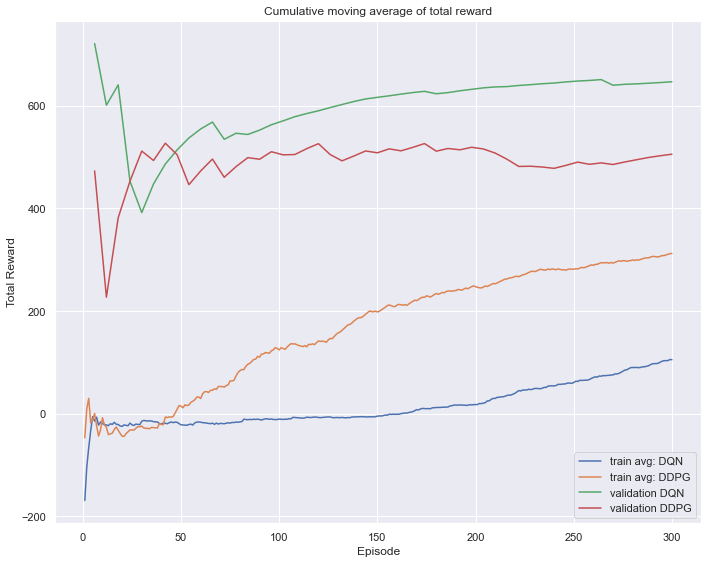

In [26]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.lineplot(x=task2_trainingResults["episode"], y=task2_trainingResults["totalReward_DQN"].expanding().mean())
sns.lineplot(x=task2_trainingResults["episode"], y=task2_trainingResults["totalReward_DDPG"].expanding().mean())

sns.lineplot(x=task2_validationResults["validationEpisode"], y=task2_validationResults["totalReward_DQN"].expanding().mean())
sns.lineplot(x=task2_validationResults["validationEpisode"], y=task2_validationResults["totalReward_DDPG"].expanding().mean())

plt.legend(labels=["train avg: DQN","train avg: DDPG", "validation DQN","validation DDPG"])
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Cumulative moving average of total reward")
plt.tight_layout()

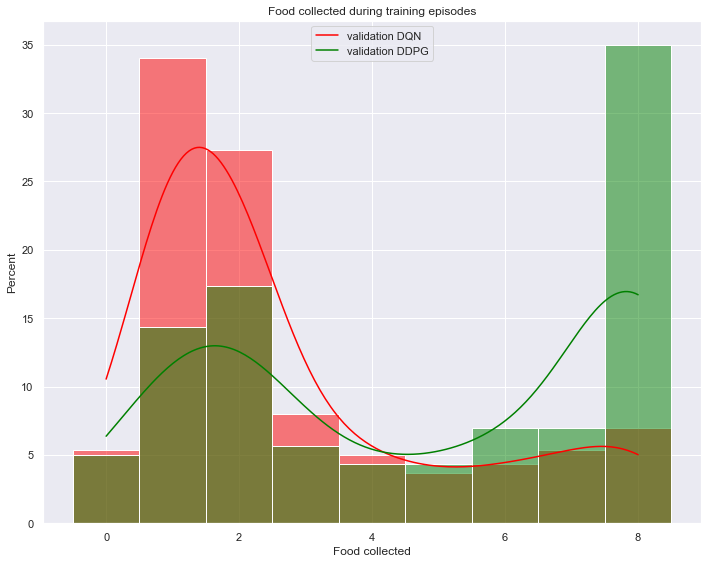

In [27]:
sns.histplot(data=task2_trainingResults, x="collectedFood_DQN", stat="percent", discrete=True, kde=True, color="red")
sns.histplot(data=task2_trainingResults, x="collectedFood_DDPG", stat="percent", discrete=True, kde=True, color="green")

plt.legend(labels=["validation DQN","validation DDPG"])
plt.xlabel("Food collected")
plt.ylabel("Percent")
plt.title("Food collected during training episodes")
plt.tight_layout()


In [28]:
#from autoviz.AutoViz_Class import AutoViz_Class
#%matplotlib inline
#AV = AutoViz_Class()
#df2 = AV.AutoViz('task2_validationResults.csv')